In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [5]:
file_train_text = "data/training_text/training_text"
file_train_variant = "data/training_variants/training_variants"

In [6]:
train_text = pd.read_csv(file_train_text, sep = '\|\|')
train_text.index.name = "ID"
train_text.columns = ["Text"]

train_variant = pd.read_csv(file_train_variant)
train_variant.set_index("ID",inplace = True)

/home/ragou/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [8]:
train_variant[train_variant["Variation"].isin(["C396R", "H398Q", "Y371H", "K382E", "C381A"])]

,Gene,Variation,Class
ID,,,
8,CBL,Y371H,4
11,CBL,K382E,4
13,CBL,C381A,4
21,CBL,C396R,4


In [9]:
train_variant[train_variant["Variation"] == "Q249E"]

,Gene,Variation,Class
ID,,,
2,CBL,Q249E,2


In [10]:
train_text.loc[[6],]

,Text
ID,
6,Oncogenic mutations in the monomeric Casitas B...


In [11]:
gene_count = train_variant["Gene"].value_counts().loc[lambda x : x > 100].to_dict()

In [12]:
gene_class = train_variant[train_variant["Gene"].isin(gene_count.keys())]

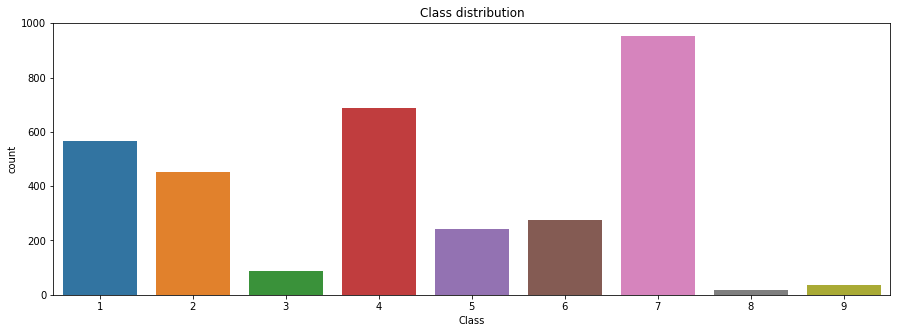

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x = train_variant["Class"])
plt.title("Class distribution")
plt.show()

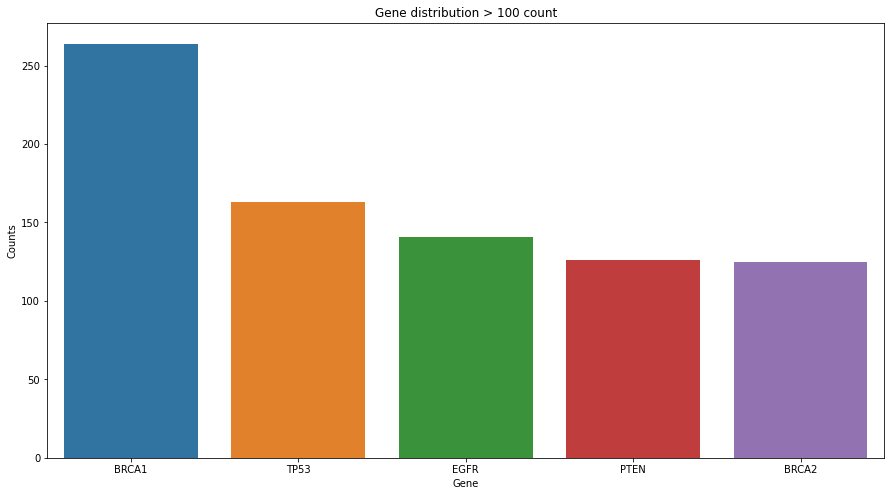

In [14]:
plt.figure(figsize=(15,8))

sns.barplot( x = list(gene_count.keys()), y = list(gene_count.values()))
plt.title("Gene distribution > 100 count")
plt.ylabel("Counts")
plt.xlabel("Gene")

plt.show()

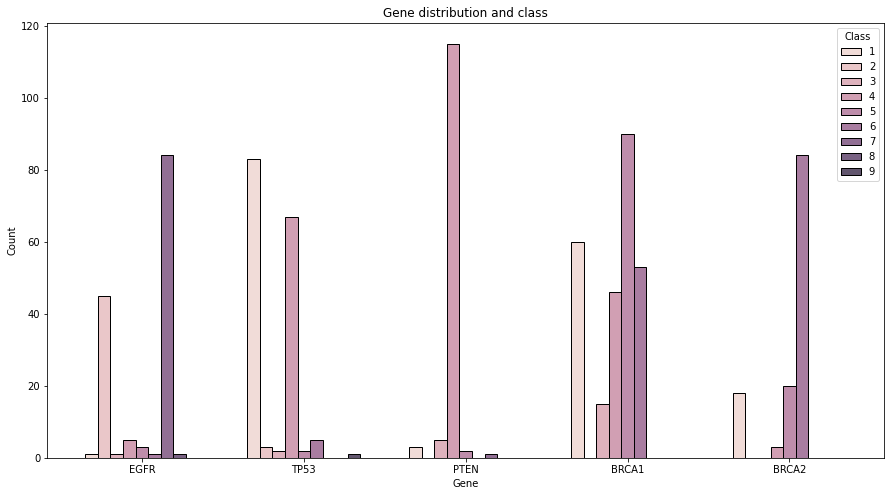

In [15]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_variant[train_variant["Gene"].isin(gene_count.keys())],
             x="Gene", hue="Class", multiple="dodge", shrink=.7)
plt.title("Gene distribution and class")
plt.show()

In [16]:
train_variant.head(5)

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4


In [200]:
train_variant[train_variant["Gene"] == "RAD51"]

,Gene,Variation,Class
ID,,,


In [17]:
train_text.head(5)

,Text
ID,
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...


# Fonction pour la selection

## clean_text
Nettoie l'article, lower puis enlève les points qui pourrait nuire à la detection des phrases, (comme les "...", ou "fig.A")


## find_match
Va détecter la phrase qui contient le mot, puis prend 1 phrase avant et après (au total 3 phrase) (voir diapo)

In [66]:
def clean_text(article):
    dot3 = re.compile("[.]{2,}")
    fig = re.compile("fig[s]?\.")
    decimal = re.compile("\d+\.\d+")    
    etal = re.compile("et al\.")
    ie = re.compile("i.e.")
    inc = re.compule("inc.")
    clean_article = article.lower()
    clean_article = dot3.sub(".", clean_article)
    clean_article = fig.sub("", clean_article)
    clean_article = decimal.sub("", clean_article)
    clean_article = etal.sub("", clean_article)
    clean_article = ie.sub("", clean_article)    
    clean_article = inc.sub("", clean_article)    
    
    return clean_article

def join_tuple_string(strings_tuple):
    return ' '.join(strings_tuple)

def find_match(text, word):
    target_sentence = "([^.]*{}[^.]*\.)".format(word)
    before_after_target = "([^.]*\.){0,1}"    
    match_exp = re.compile(before_after_target + target_sentence + before_after_target)
    match_text = match_exp.findall(clean)    
    return "".join(list(map(join_tuple_string, match_text)))

#def extract_match(line):
#    text = clean_text(line["Text"])
#    variation = line["Variation"].lower()
#    gene = line["Gene"].lower()
    
    
    

# Exemple à la main juste pour tester

In [40]:
word_to_search = "FAM58A"

In [41]:
article = train_text.loc[0].values[0]

In [42]:
article.count(word_to_search)

34

In [43]:
clean_match = find_match(article, word_to_search)

In [44]:
print("Before selection : total lenght {} and {} occurences of the word {}".format(
    len(article),article.count(word_to_search) , word_to_search))

print("After selection :  total lenght {} and {} occurences of the word {}".format(
    len(clean_match),clean_match.count(word_to_search), word_to_search))

Before selection : total lenght 39672 and 34 occurences of the word FAM58A
After selection :  total lenght 9356 and 34 occurences of the word FAM58A


In [114]:
concatenate_data = pd.merge(train_variant, train_text, on="ID").dropna()
concatenate_data

,Gene,Variation,Class,Text
ID,,,,
0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...,...,...
3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...
3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...
3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...


# Explications du problème
Fonction poubelle juste pour voir ceux qui sont pas détectable --> len(match) == 0

Si ils sont pas détectable, c'est que le nom donné pour leurs variation sont pas dans l'article, donc je vérfie à la main sur le site https://regex101.com/r/lvQZIf/1 qui sert à visualiser les expressions régulières.
En copiant collant tout l'article, je regarde comment je peux détecter la variation avec un autre nom ducoup, comme le nom de base ne marche pas.

Par exemple Id = 19, y371s n'est pas dans l'article mais il y est sous la forme tyr371ser.

Cet regexpr ne marche pas (le texte est en minuscule) -> `([^.]*\.){0,1}([^.]*y371s[^.]*\.)([^.]*\.){0,2}`

Mais celle la marchera -> `([^.]*\.){0,1}([^.]*tyr371ser[^.]*\.)([^.]*\.){0,2}` (ça donne 3 match sur le site pour l'article id = 19)

(pour les regex, il faut juste changer le nom au milieu après `*` et avant `[^.]`)

Autre exemple, ID = 102, mutation r922* qui n'est mentionné sous aucunes formes, ni même la position 922. Mais, il y a des mots qui peuvent faire penser à cette mutation du genre "nonsense mutations" car l'étoile (\*) veut dire que r922 est devenu un codon stop, donc c'est une mutation non sens. Faudrait voir si je peux convertir ces mutations en mot pour faciliter la détection, ou utiliser un champ lexical.


Donc là, j'essaie de faire plus ou moins au cas par cas (pas tous, y en a 880...) pour déterminer des groupes de variations indétectable pour revoir la détection.
Par exemple, pour les variations de type `y371s`, je peux prendre `y371`, ou tout simplement `371` qui peuvent détecter la variation dans certain cas.


Par contre, pour ceux où y a vraiment pas d'infos dans l'article avec la variation, du genre `t1365m` ID = 44; je sais pas quoi faire d'eux :)
Car la position 1365 n'est même pas mentionné dans l'article, donc je vois pas comment détecter les infos liées à cette mutation...

Soit je garde l'article entier, soit je prend le nom du gène pour la détection, mais le pb avec ça, c'est que ducoup tout ceux qui sont indétectables de ce gène là, auront les mêmes lignes de détecté car je détecterai uniquement en utilisant le nom du gène, donc y aura pas de différences entre eux même si la variation diffère.




## Ne lance pas la cellule juste en bas, ça prend un certain temps et de toute façon, tu as déjà la sortie avec tout ceux qui ne marchent pas.

La sortie est de la forme : 
`variation | id | len(article_original) | len(match)`

Certaines variations sont des mots complets du genre `truncating mutations`, un peu relou pour la détection, ce qu'on pourrait faire, c'est utiliser des mots qui ressemble à truncating grace à des méthodes de traitements de texte qui va prendre que le préfix par exemple et automatiser ça pour les mots

In [118]:
def check_line(x):
    match = len(find_match(x["Text"], x["Variation"]))
    if match == 0:
        print(x["Variation"].lower(), x.name, len(x["Text"]), match))

        
concatenate_data.apply(lambda x : check_line(x) , axis = 1)

truncating mutations 0 39672 0
truncating mutations 16 54507 0
y371s 19 20698 0
t1365m 44 13014 0
t844m 46 9081 0
r1343l 49 13014 0
r1209w 61 13014 0
q984k 63 42783 0
n1125i 66 42783 0
y35c 67 66054 0
y35h 69 66054 0
amplification 71 44437 0
l234fs 72 76910 0
l1273f 73 27028 0
amplification 75 44437 0
i290a 80 43021 0
truncating mutations 88 15618 0
c41y 91 23674 0
p83l 93 23674 0
tgfbr1*6a 96 140451 0
truncating mutations 100 203122 0
r922* 102 84989 0
e1322* 104 104807 0
g39e 106 40090 0
r1076c 108 52438 0
truncating mutations 110 179443 0
v509a 111 40090 0
e946* 112 95425 0
f1088lfs*5 113 124926 0
f1088sfs*2 114 117868 0
truncating mutations 117 95005 0
n1333gfs* 120 14270 0
r625d 125 7730 0
h662r 127 73431 0
e622q 131 117015 0
k666r 134 73431 0
r957q 136 33576 0
l747_t751delinsp 138 95317 0
s752_i759del 139 222215 0
i491m 140 2924 0
d770_p772dup 141 205155 0
n771_h773dup 144 201980 0
k467t 145 2924 0
e746_t751insip 146 47739 0
d770_n771insd 147 182847 0
k745_a750del 149 86157 0
v76

w714* 1317 78356 0
r725c 1320 73221 0
p648s 1321 78356 0
p648l 1322 78356 0
truncating mutations 1323 83811 0
a120s 1324 34744 0
v384d 1325 76210 0
l622h 1328 78356 0
l582f 1329 78356 0
l559r 1331 78356 0
r659l 1332 38264 0
l749p 1333 78356 0
amplification 1337 84962 0
truncating mutations 1338 46085 0
h355m 1375 30619 0
fgfr1op1-fgfr1 fusion 1379 137607 0
fgfr1-tacc1 fusion 1385 38958 0
erlin2?fgfr1 fusion 1389 38953 0
a500t 1393 36711 0
igh-fgfr3 fusion 1398 87969 0
y647c 1401 36711 0
e627d 1404 36711 0
v677i 1408 36711 0
fgfr3 - baiap2l1 fusion 1410 22184 0
d646y 1411 36711 0
c582f 1412 36711 0
h643d 1413 36711 0
n653h 1428 36711 0
truncating mutations 1450 32803 0
e565g 1463 57941 0
n549s 1466 57941 0
fgfr2?pphln1 fusion 1470 55264 0
m535i 1478 57941 0
k525e 1479 32321 0
fgfr2-tacc3 fusion 1481 28215 0
fgfr2-kiaa1967 fusion 1482 38953 0
s267_d273dup 1483 28215 0
l617m 1486 57941 0
w290_i291delinsc 1487 28215 0
k641n 1489 57941 0
v564i 1498 57941 0
k659e 1499 15317 0
n535k 1501 2596

n987i 2873 22651 0
d1420y 2874 22651 0
t2681r 2875 22651 0
s206c 2880 39129 0
a2770t 2881 38459 0
r2318q 2886 38459 0
r174c 2888 39129 0
t3211k 2892 22651 0
m2676t 2895 22651 0
e106g 2900 1219 0
q538p 2906 1219 0
q324l 2908 1219 0
pax8-ppar? fusion 2910 44669 0
t80a 2913 65971 0
g81r 2915 65971 0
w24r 2916 65971 0
g81d 2919 65971 0
v32g 2921 65971 0
d29y 2922 65971 0
d29h 2924 65971 0
g81s 2925 65971 0
i28t 2926 65971 0
t80r 2931 65971 0
w24s 2932 65971 0
r380a 2933 36001 0
r544s 2935 61206 0
e14* 2938 26643 0
s36y 2939 31488 0
truncating mutations 2959 8760 0
l576del 2962 40141 0
i563_l576del 2966 41812 0
k550_k558del 2970 50133 0
p577_d579del 2971 21972 0
y553_k558del 2974 38444 0
p551_e554del 2976 74843 0
t417_d419delinsrg 2977 11907 0
t417_d419delinsi 2978 11907 0
n655k 2980 2661 0
f522c 2982 19997 0
k558delinsnp 2984 115246 0
y553_q556del 2987 23529 0
p577_w582delinspyd 2989 30974 0
e554_k558del 2991 106513 0
p551_v555del 2992 11687 0
s501_a502dup 2993 14516 0
t574_r588delinsl 299

# Variable ID pour faciliter le print des deux cellules suivantes pour choper le text, la variation et le gene d'un ID et les copier coller sur le site regex

Pour la détection, je teste juste avec le nom de la variation, puis vraiment si y a rien, je regarde du coté du nom du gène

In [197]:
ID = 96

In [183]:
concatenate_data.loc[ID,"Text"].lower()

"acquired uniparental disomy (aupd) is a common feature of cancer genomes, leading to loss of heterozygosity. aupd is associated not only with loss-of-function mutations of tumour suppressor genes1, but also with gain-of-function mutations of proto-oncogenes2. here we show unique gain-of-function mutations of the c-cbl (also known as cbl) tumour suppressor that are tightly associated with aupd of the 11q arm in myeloid neoplasms showing myeloproliferative features. the c-cbl proto-oncogene, a cellular homologue of v-cbl, encodes an e3 ubiquitin ligase and negatively regulates signal transduction of tyrosine kinases3, 4, 5, 6. homozygous c-cbl mutations were found in most 11q-aupd-positive myeloid malignancies. although the c-cbl mutations were oncogenic in nih3t3 cells, c-cbl was shown to functionally and genetically act as a tumour suppressor. c-cbl mutants did not have e3 ubiquitin ligase activity, but inhibited that of wild-type c-cbl and cbl-b (also known as cblb), leading to prolo

In [198]:
print(concatenate_data.loc[ID,"Variation"].lower(),
concatenate_data.loc[ID,"Gene"].lower())

tgfbr1*6a tgfbr1


In [207]:
train_text.loc[train_variant[train_variant["Gene"] == "CBL"].loc[:25,:].index,]

,Text
ID,


In [217]:
CBL = train_variant[train_variant["Gene"] == "CBL"]
CBL

,Gene,Variation,Class
ID,,,
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4
5,CBL,V391I,4
6,CBL,V430M,5
7,CBL,Deletion,1
8,CBL,Y371H,4
9,CBL,C384R,4


In [222]:
article_cbl = train_text.loc[CBL.index,]
article_cbl

,Text
ID,
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...
5,Oncogenic mutations in the monomeric Casitas B...
6,Oncogenic mutations in the monomeric Casitas B...
7,CBL is a negative regulator of activated recep...
8,Abstract Juvenile myelomonocytic leukemia (JM...
9,Abstract Juvenile myelomonocytic leukemia (JM...


In [219]:
CBL.to_csv("cbl.txt")

In [228]:
article_cbl.to_csv("cbl_article.txt", sep="|")
import numpy as np

In [268]:
CBL = train_variant[train_variant["Gene"] == "RUNX1"]
article_cbl = train_text.loc[CBL.index,]

CBL.to_csv("cbl.txt")
dtf = pd.merge(pd.DataFrame(CBL.index), article_cbl, on ="ID")
np.savetxt("cbl_article.txt",dtf, fmt = "%d||%s", header= ",".join(dtf.columns), comments='')

In [259]:

",".join(dtf.columns)

'ID,Text'